In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [2]:
fichero = "C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Sistemas de Aprendizaxe Automático\\archivos\\winequality-red.csv"
datos = pd.read_csv(fichero)

In [3]:
from sklearn.model_selection import train_test_split

X, y = datos.drop('quality', axis=1), datos['quality']
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full,y_train_full)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val =   scaler.transform(X_val)
X_test =  scaler.transform(X_test)

In [5]:
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
X_train_full.shape

(1199, 11)

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (11,)))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,810 (257.07 KB)

 Trainable params: 65,810 (257.07 KB)

 Non-trainable params: 0 (0.00 B)

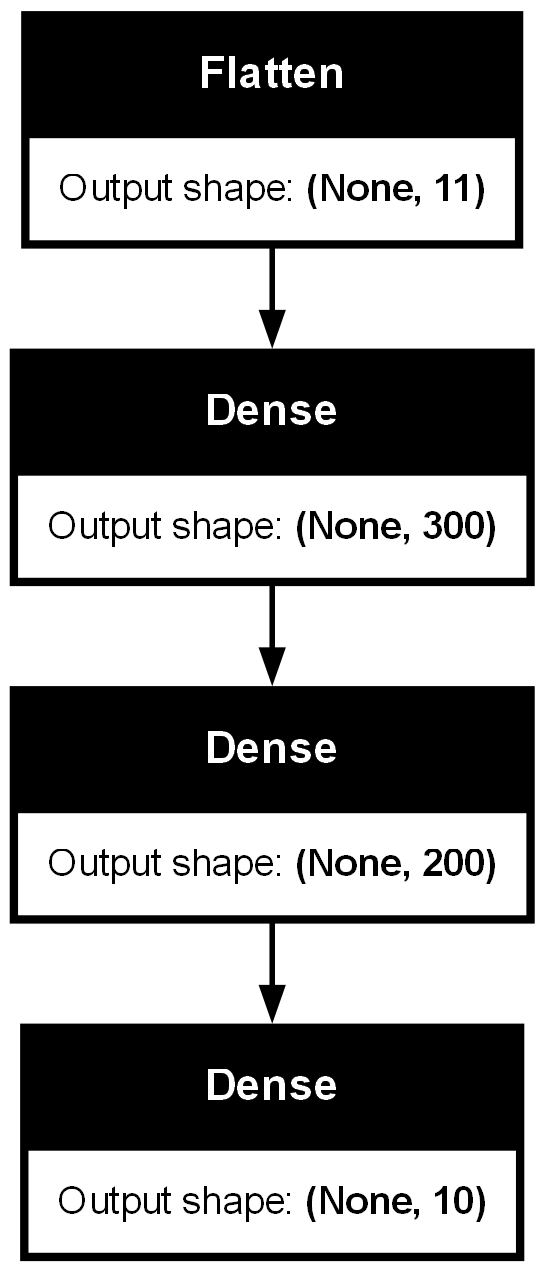

In [8]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [9]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,810 (257.07 KB)

 Trainable params: 65,810 (257.07 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
epochs = 100000
batch_size = 20

early_stopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)


historia = model.fit(X_train_full, y_train_full, epochs=epochs,
                      batch_size = batch_size,
                      callbacks=[early_stopping],
                      validation_data=(X_val, y_val))

Epoch 1/100000
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3811 - loss: 3.1540 - val_accuracy: 0.3567 - val_loss: 2.1246
Epoch 2/100000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4582 - loss: 1.1896 - val_accuracy: 0.3700 - val_loss: 2.1104
Epoch 3/100000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4633 - loss: 1.1673 - val_accuracy: 0.3867 - val_loss: 2.1012
Epoch 4/100000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4814 - loss: 1.1514 - val_accuracy: 0.4000 - val_loss: 2.0938
Epoch 5/100000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5006 - loss: 1.1439 - val_accuracy: 0.3967 - val_loss: 2.0863
Epoch 6/100000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4858 - loss: 1.1391 - val_accuracy: 0.4033 - val_loss: 2.0796
Epoch 7/100000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4872 - loss: 1.1343 - val_accuracy: 0.4167 - val_loss: 2.0728
Epoch 8/100000
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4979 - loss: 1.1304 - 

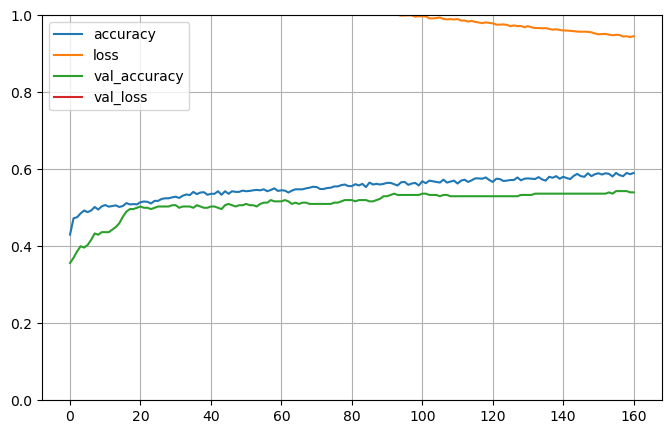

In [12]:
pd.DataFrame(historia.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
model.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.4716 - loss: 1.5904


[1.5756595134735107, 0.48500001430511475]

In [14]:
X_nuevas = X_test[:3]
y_nuevas_pred = model.predict(X_nuevas)
y_nuevas_pred.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[0.04, 0.05, 0.04, 0.04, 0.06, 0.24, 0.26, 0.13, 0.12, 0.03],
       [0.07, 0.06, 0.06, 0.09, 0.13, 0.31, 0.12, 0.05, 0.05, 0.06],
       [0.03, 0.03, 0.03, 0.18, 0.12, 0.4 , 0.15, 0.02, 0.02, 0.02]],
      dtype=float32)

In [15]:
y_pred = np.argmax(y_nuevas_pred, axis=1)
y_pred

array([6, 5, 5], dtype=int64)

In [16]:
y_pred[:10]

array([6, 5, 5], dtype=int64)

In [17]:
y_test[:10]

295     5
1054    6
641     5
440     8
434     6
1469    3
808     5
1233    4
207     5
523     5
Name: quality, dtype: int64